# 종합실습2_MNIST

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [3]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

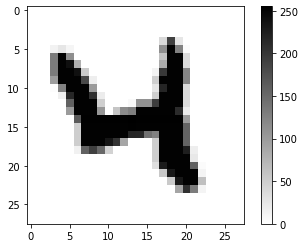

In [6]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 20

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [7]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,
          0,   0],
       [  

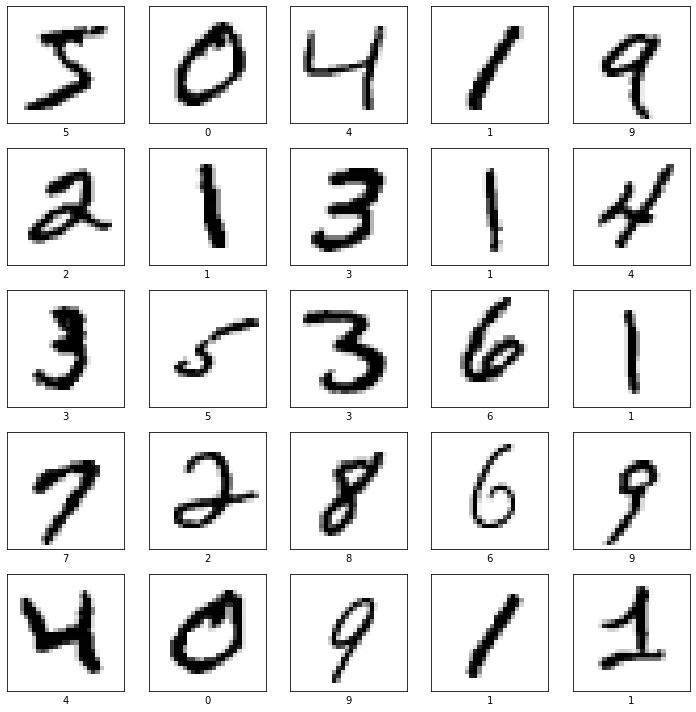

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

### (1) 데이터 2차원으로 펼치기

In [9]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
a = np.array([[1,2,3],[4,5,6]])
a, a.shape

(array([[1, 2, 3],
        [4, 5, 6]]), (2, 3))

In [11]:
#
print(a.reshape(3,2))
print(a.reshape(6,1))
print(a.reshape(6, -1))

[[1 2]
 [3 4]
 [5 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [12]:
x_train = x_train.reshape(60000, -1)
x_val = x_val.reshape(10000, -1)

In [13]:
x_train.shape, x_val.shape

((60000, 784), (10000, 784))

### (2) Scaling : Min-Max
* 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
* x_train, x_test를 그냥 255로 나누면 됨

In [14]:
x_train = x_train / 255.
x_test = x_val / 255.

## 4.모델링

In [19]:
nfeatures = x_train.shape[1]
nfeatures

784

In [20]:
clear_session()

model = Sequential(Dense(10, input_shape = (nfeatures,), activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy' )

history = model.fit(x_train, y_train, epochs = 20, validation_split=0.2).history

* 학습결과 그래프

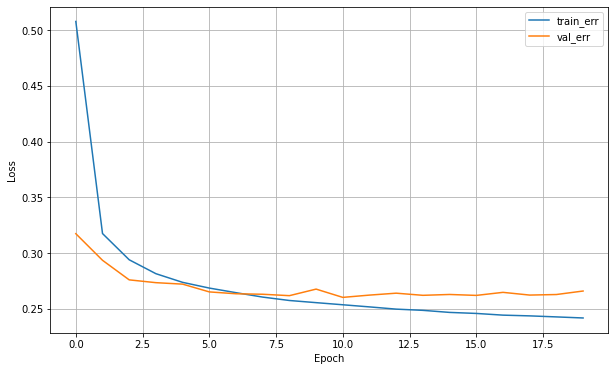

In [22]:
dl_history_plot(history)

* 예측 및 평가

In [23]:
pred = model.predict(x_test)
pred_1 = pred.argmax(axis=1)

313/313 [==============================] - 1s 3ms/step


In [24]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[ 946    0    2    2    1    6   16    4    3    0]
 [   0 1118    3    2    0    1    3    2    6    0]
 [   3   10  942   11    6    4   10    8   35    3]
 [   2    0   25  914    0   24    2    9   27    7]
 [   1    2    8    1  913    0   10    4   10   33]
 [   6    2    6   36    7  775   11    7   36    6]
 [   9    3   10    1    7   14  911    1    2    0]
 [   1    7   26    8    5    1    0  941    2   37]
 [   3   12    8   17    8   21    6    6  884    9]
 [   8    8    2    9   22    4    0   15   10  931]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.91      0.91      0.91      1032
           3       0.91      0.90      0.91      1010
           4       0.94      0.93      0.94       982
           5       0.91      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.94      0.92   

## 5.실습

* 히든레이어를 추가하여 모델을 2가지 이상 만들고 성능을 비교해 봅시다.
* 성능에 영향을 주는 요인은
    * 히든레이어 수
    * 노드수
    * epochs 수 (10~20 사이에서 정하세요)
    * learning_rate

### (1) 모델1

In [19]:
n = x_train.shape[1]
n

784

In [20]:
m2 = Sequential([Dense(128, input_shape = (n, ) , activation = 'relu'),
                 Dense(32,  activation = 'relu' ),
                 Dense(10, activation = 'softmax')])
m2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [21]:
m2.compile(optimizer=Adam(learning_rate=0.001), loss = 'sparse_categorical_crossentropy')
hist = m2.fit(x_train, y_train, epochs = 20, validation_split = .2).history

Epoch 1/20
1500/1500 [==============================] - 7s 3ms/step - loss: 0.2814 - val_loss: 0.1436
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1188 - val_loss: 0.1241
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0832 - val_loss: 0.1000
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0620 - val_loss: 0.0934
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0456 - val_loss: 0.0968
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0382 - val_loss: 0.0956
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0307 - val_loss: 0.0954
Epoch 8/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0249 - val_loss: 0.0944
Epoch 9/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0243 - val_loss: 0.1106
Epoch 10/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.018

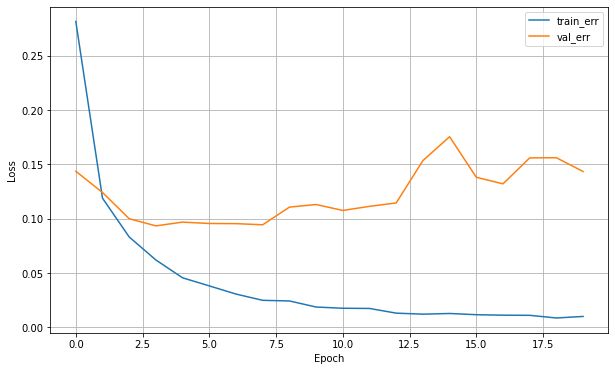

In [22]:
dl_history_plot(hist)

In [24]:
p2 = m2.predict(x_val)
p2 = p2.argmax(axis = 1)

print(confusion_matrix(y_val, p2))
print(classification_report(y_val, p2))
print(accuracy_score(y_val, p2))

313/313 [==============================] - 1s 2ms/step
[[ 968    0    1    1    0    1    3    4    1    1]
 [   0 1122    3    1    0    0    3    1    4    1]
 [   4    4 1000    5    6    0    3    4    6    0]
 [   0    0    8  988    0    6    0    3    2    3]
 [   0    0    0    1  954    1    6    6    1   13]
 [   2    0    0    6    1  867    3    4    8    1]
 [   2    3    1    1    5    4  942    0    0    0]
 [   0    9    6    2    1    0    0 1004    2    4]
 [   2    1    0    7    2    8    3    4  942    5]
 [   1    3    0    3    2    1    2    8    4  985]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98  

### (2) 모델2